In [24]:
## Basic Libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import joblib  
%matplotlib inline

In [2]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [5]:
## Import data from Kaggle

# Set the Kaggle config directory to the folder containing your kaggle.json file
#os.environ['KAGGLE_CONFIG_DIR'] = 'C:/Users/Ifelo/.kaggle'

# Continue with Kaggle API calls
#import kaggle

# Replace 'dataset-name' and 'owner-name' with your desired dataset and owner's username.
#kaggle.api.dataset_download_files('ashydv/sales-prediction-simple-linear-regression', path='./', unzip=True)

In [6]:
# Load a CSV file from the downloaded dataset
df = pd.read_csv('Sales.csv')

In [8]:
## Data Exploration
print("Shape of the dataset:", df.shape)  # Show the number of rows and columns
print("\nColumns in the dataset:", df.columns)  # Display column names
print("\nData types of columns:")
print(df.dtypes)  # Show the data types of each column
print("\nSummary statistics:")
print(df.describe())  # Show summary statistics (mean, std, min, max, etc.) for numerical columns
print("\nFirst few rows of the dataset:")
print(df.head())  # Display the first few rows of the dataset
print("\nLast few rows of the dataset:")
print(df.tail())  # Display the last few rows of the dataset
print("\nMissing values in the dataset:")
print(df.isnull().sum())  # Show the count of missing values in each column

Shape of the dataset: (200, 4)

Columns in the dataset: Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Data types of columns:
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

Summary statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

First few rows of the dataset:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Last few rows of 

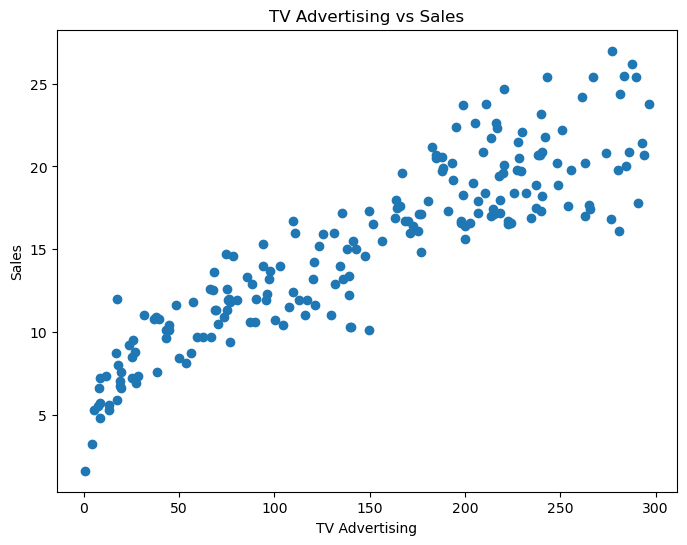

In [10]:
# Scatter plot of TV vs Sales
plt.figure(figsize=(8, 6))
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('TV Advertising vs Sales')
plt.show()

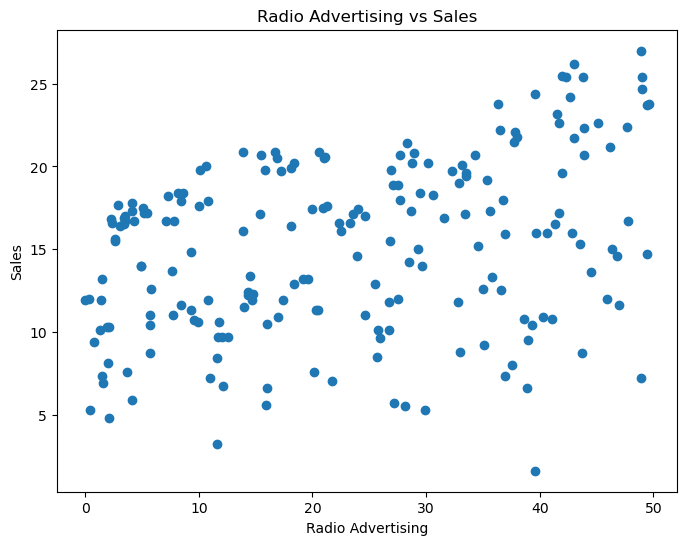

In [11]:
# Scatter plot of Radio vs Sales
plt.figure(figsize=(8, 6))
plt.scatter(df['Radio'], df['Sales'])
plt.xlabel('Radio Advertising')
plt.ylabel('Sales')
plt.title('Radio Advertising vs Sales')
plt.show()

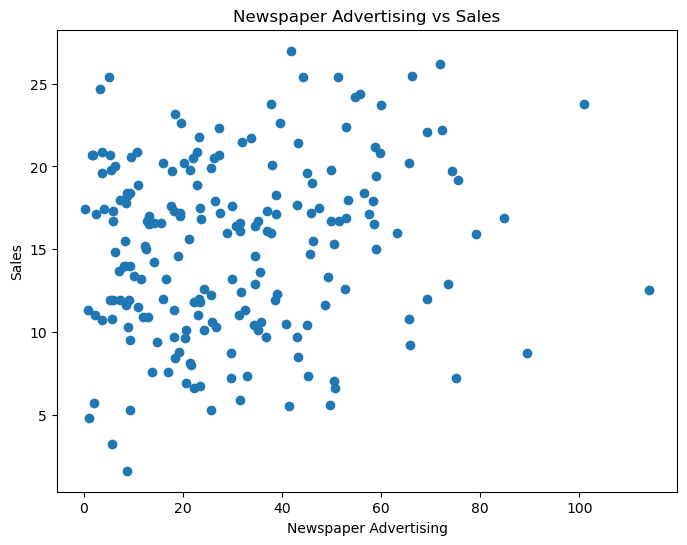

In [12]:
# Scatter plot of Newspaper vs Sales
plt.figure(figsize=(8, 6))
plt.scatter(df['Newspaper'], df['Sales'])
plt.xlabel('Newspaper Advertising')
plt.ylabel('Sales')
plt.title('Newspaper Advertising vs Sales')
plt.show()

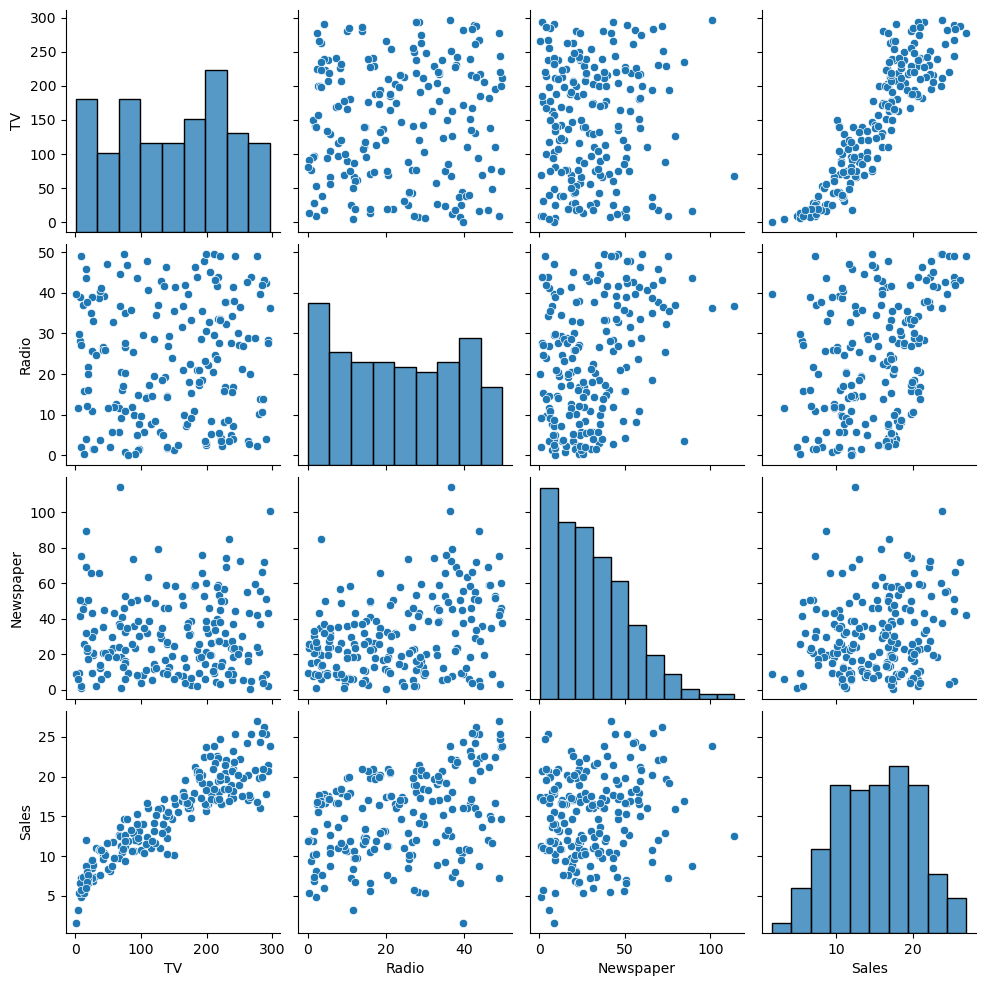

In [13]:
# Pairplot for all columns
sns.pairplot(df)
plt.show()


In [14]:
# Define feature and target variable
x = df.drop("Sales", axis=1)
y = df["Sales"]

In [15]:
# Split into test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [25]:
# Initializing and fitting the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predicting on the test set
y_pred = model.predict(x_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4.522552562041289
R-squared: 0.8645053923967725


In summary, an MSE of 4.52 indicates moderate errors in prediction, while an R-squared of 0.86 suggests that your model explains a substantial portion of the variability in the Sales data based on the features used (TV, Radio, Newspaper).